# Explore here

In [21]:
# Your code here
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [8]:
df = pd.read_csv('../data/raw/housing.csv', sep=",")
df = df[['Latitude', 'Longitude', 'MedInc']]
df

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [10]:
#dividimos los datos en entrenamiento y test
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
#clasificamos los datos en 6 clusters y llamamos a la columna 'cluster'
kmeans = KMeans(n_clusters=6, random_state=42)
X_train['cluster'] = kmeans.fit_predict(X_train)

In [15]:
X_train

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5
...,...,...,...,...
11284,33.78,-117.96,6.3700,2
11964,34.02,-117.43,3.0500,3
5390,34.03,-118.38,2.9344,3
860,37.58,-121.96,5.7192,0


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

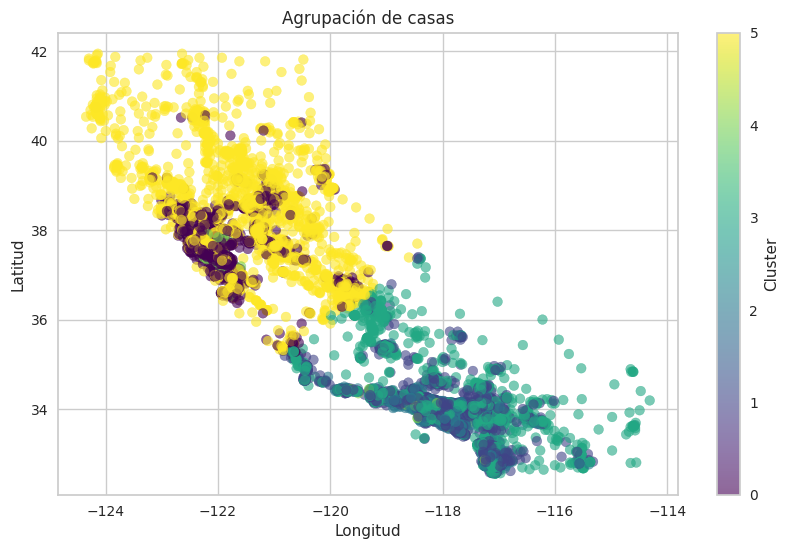

In [18]:
#hacemos un plto
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.6)
plt.title('Agrupación de casas')
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.colorbar(label='Cluster')
plt.show()

In [19]:
#predecimos sobre test
X_test['cluster'] = kmeans.predict(X_test)

/tmp/ipykernel_3072/1861167419.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='viridis', edgecolor='black', marker='x', label='Test')
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Gen

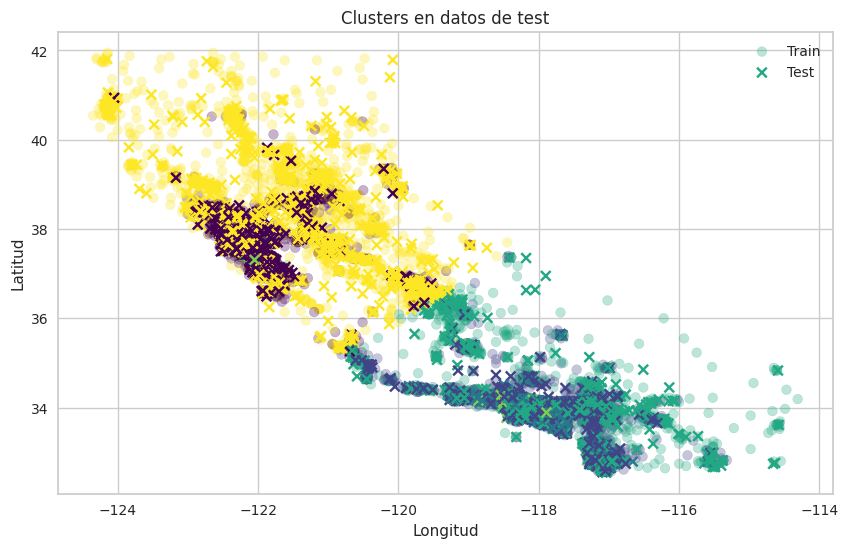

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.3, label='Train')
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='viridis', edgecolor='black', marker='x', label='Test')
plt.title("Clusters en datos de test")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.legend()
plt.show()

en los dos plots se ve una clara diferencia en las zonas geográficas y las casas tienen patrones similares entre ubicación e ingresos. Esto sugiere que los clusters son geográficamente significativos y además coherentes. 

In [ ]:
#cluster es la variblae objetivo y entrenamos un modelo para predecir cluster a partir de las varibles
#elegimos random forest porque no hay que normalizar ni modelar  y porque puede modelar relaciones complejas.
X = ['Latitude', 'Longitude', 'MedInc']
y = 'cluster'
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train[X], X_train[y])
y_pred = clf.predict(X_test[X])

print(classification_report(X_test[y], y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



El accuracy es de un 100% y precisión, recall y f1 no bajan de 0.98, lo que indica que el modelo ha aprendido a clasificar los clusters muy bien. 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

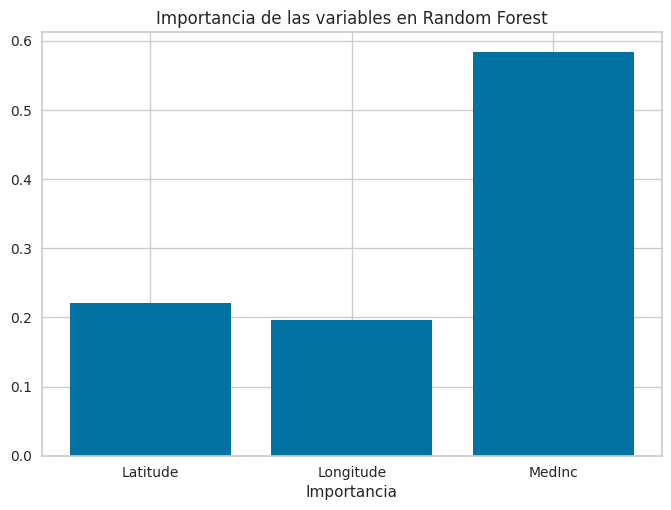

In [26]:
importances = clf.feature_importances_
plt.bar(X, importances)
plt.xlabel("Importancia")
plt.title("Importancia de las variables en Random Forest")
plt.show()

MedInc es la variable que más influye con diferencia, por ello el ingreso medio es clave para distinguir los clusters y que latitud y longitud también son importantes pero en menor medida. 